# Data Import & Cleaning

In [79]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing as pp
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

from scipy.stats.mstats import winsorize
from dython.nominal import associations

from scipy.stats import ks_2samp
import itertools

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Import 

In [80]:
## Read data
folder = os.path.join(os.getcwd(), "Data_loans/")
files = os.listdir(folder)

data_part1 = pd.read_csv(folder+files[0], delimiter='\t')
data_part2 = pd.read_csv(folder+files[1], delimiter='\t')
data_part3 = pd.read_csv(folder+files[2], delimiter='\t')
data_part4 = pd.read_csv(folder+files[3], delimiter='\t')

data_list = [data_part1, data_part2, data_part3, data_part4]
data = pd.concat(data_list)
data = data.reset_index(drop=True)
data.replace('nan',np.NaN)


C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_38436\3093623256.py:6: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_part2 = pd.read_csv(folder+files[1], delimiter='\t')


,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,licensed bankere,2 years,RENT,40000.00,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000,36 months,12.29,700.42,Agent,5 years,MORTGAGE,110000.00,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000,36 months,9.99,161.32,City Carrier,10+ years,RENT,56500.00,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000,60 months,15.31,503.02,"Gracon Services, Inc",10+ years,MORTGAGE,64000.00,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [81]:
## Handling wrong data

# Dropping distorted row 
# In dataset 2, row 109161 is wrongly shifted and distorts the whole dataset. Hence we remove it.
data = data.drop(109161) 

# Set type of numeric columns that wrongly weren't numeric
data["revol_util"] = pd.to_numeric(data["revol_util"])
data["total_acc"] = pd.to_numeric(data["total_acc"])
data["mort_acc"] = pd.to_numeric(data["mort_acc"])

#data.to_excel("beforeCleaning_monthly.xlsx")



In [82]:
# Get states for address
data['address'] = data['address'].str[-8:-6]

# Get only year for issue_d and earliest_cr_line
data['issue_d'] = data['issue_d'].str[4:]
data['earliest_cr_line'] = data['earliest_cr_line'].str[4:]

# settings to display all columns
pd.set_option("display.max_columns", None)

data

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.00,Not Verified,2015,Fully Paid,vacation,Vacation,26.24,1990,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00,OK
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00,SD
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.00,Source Verified,2015,Fully Paid,credit_card,Credit card refinancing,12.79,2007,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00,WV
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.00,Not Verified,2014,Fully Paid,credit_card,Credit card refinancing,2.60,2006,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00,MA
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,2013,Charged Off,credit_card,Credit Card Refinance,33.95,1999,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,licensed bankere,2 years,RENT,40000.00,Source Verified,2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,2004,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00,DC
396026,21000,36 months,12.29,700.42,Agent,5 years,MORTGAGE,110000.00,Source Verified,2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,2006,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00,LA
396027,5000,36 months,9.99,161.32,City Carrier,10+ years,RENT,56500.00,Verified,2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,1997,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00,NY
396028,21000,60 months,15.31,503.02,"Gracon Services, Inc",10+ years,MORTGAGE,64000.00,Verified,2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,1990,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00,FL


Handling of data:
*   Index 109161 (VSC) [or 208166 in Collab] distorted data bcs field "title" included also "dti" and others (mistake in .txt file) -> removed from dataset
*   3 columns that should be numeric aren't. Hence datatype made numeric:
    *   revol_util
    *   total_acc
    *   mort_acc

## Data Cleaning



### Summary Statistics

In [83]:
# Data length and info
n_data = len(data)
print("Number of data points: "+str(n_data)+"\n")

data.info()


Number of data points: 396029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396029 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396029 non-null  int64  
 1   term                  396029 non-null  object 
 2   int_rate              396029 non-null  float64
 3   installment           396029 non-null  float64
 4   emp_title             373102 non-null  object 
 5   emp_length            377728 non-null  object 
 6   home_ownership        396029 non-null  object 
 7   annual_inc            396029 non-null  float64
 8   verification_status   396029 non-null  object 
 9   issue_d               396029 non-null  object 
 10  loan_status           396029 non-null  object 
 11  purpose               396029 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396029 non-null  float64
 14  earliest_cr_line     

In [84]:
# Splitting numerical and categorical variables
data_num = data.select_dtypes(include=['float64','int64'])
data_cat = data.select_dtypes(include=['object'])

In [85]:
# Summary for categorical data
data_cat.describe().T

,count,unique,top,freq
term,396029,2,36 months,302004
emp_title,373102,173104,Teacher,4389
emp_length,377728,11,10+ years,126040
home_ownership,396029,6,MORTGAGE,198347
verification_status,396029,3,Verified,139563
issue_d,396029,10,2014,102859
loan_status,396029,2,Fully Paid,318357
purpose,396029,14,debt_consolidation,234507
title,394274,48816,Debt consolidation,152472
earliest_cr_line,396029,65,2000,29366


In [86]:
# Summary for numerical data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_num.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,395753.00,396029.00,358234.00,395494.00
mean,14113.90,13.64,431.85,74203.24,17.38,11.31,0.18,15844.56,53.79,25.41,1.81,0.12
std,8357.45,4.47,250.73,61637.69,18.02,5.14,0.53,20591.86,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [87]:
## Count NaN
# compute number of NaN values and percentage of NaN values for each column
nan_count = data.isna().sum()
nan_pct = data.isna().sum()/n_data

# create a new dataframe to store the results
nans = pd.DataFrame({'nan_count': nan_count, 'nan_pct': nan_pct})
nans["nan_pct_str"] = pd.Series(["{0:.2f}%".format(val * 100) for val in nans["nan_pct"]], index = nans.index)
nans

,nan_count,nan_pct,nan_pct_str
loan_amnt,0,0.00,0.00%
term,0,0.00,0.00%
int_rate,0,0.00,0.00%
installment,0,0.00,0.00%
emp_title,22927,0.06,5.79%
emp_length,18301,0.05,4.62%
home_ownership,0,0.00,0.00%
annual_inc,0,0.00,0.00%
verification_status,0,0.00,0.00%
issue_d,0,0.00,0.00%


In [88]:
# Value count for categorical data
vcs = dict()

for col in data_cat.columns:
    vc = data[col].value_counts().to_frame()
    vc["pct"] =  vc[col] / vc[col].sum()
    vc["pct"] = pd.Series(["{0:.2f}%".format(val * 100) for val in vc["pct"]], index = vc.index)
    vcs["vc {0}".format(col)] = vc
    display(vc)

,term,pct
36 months,302004,76.26%
60 months,94025,23.74%


,emp_title,pct
Teacher,4389,1.18%
Manager,4250,1.14%
Registered Nurse,1856,0.50%
RN,1846,0.49%
Supervisor,1830,0.49%
...,...,...
Postman,1,0.00%
"McCarthy & Holthus, LLC",1,0.00%
jp flooring,1,0.00%
Histology Technologist,1,0.00%


,emp_length,pct
10+ years,126040,33.37%
2 years,35827,9.48%
< 1 year,31725,8.40%
3 years,31665,8.38%
5 years,26495,7.01%
1 year,25882,6.85%
4 years,23952,6.34%
6 years,20841,5.52%
7 years,20819,5.51%
8 years,19168,5.07%


,home_ownership,pct
MORTGAGE,198347,50.08%
RENT,159790,40.35%
OWN,37746,9.53%
OTHER,112,0.03%
NONE,31,0.01%
ANY,3,0.00%


,verification_status,pct
Verified,139563,35.24%
Source Verified,131385,33.18%
Not Verified,125081,31.58%


,issue_d,pct
2014,102859,25.97%
2013,97662,24.66%
2015,94264,23.80%
2012,41202,10.40%
2016,28088,7.09%
2011,17435,4.40%
2010,9258,2.34%
2009,3826,0.97%
2008,1240,0.31%
2007,195,0.05%


,loan_status,pct
Fully Paid,318357,80.39%
Charged Off,77672,19.61%


,purpose,pct
debt_consolidation,234507,59.21%
credit_card,83019,20.96%
home_improvement,24029,6.07%
other,21185,5.35%
major_purchase,8790,2.22%
small_business,5701,1.44%
car,4697,1.19%
medical,4196,1.06%
moving,2854,0.72%
vacation,2452,0.62%


,title,pct
Debt consolidation,152472,38.67%
Credit card refinancing,51487,13.06%
Home improvement,15264,3.87%
Other,12930,3.28%
Debt Consolidation,11608,2.94%
...,...,...
Daughter's Wedding Bill,1,0.00%
gotta move,1,0.00%
creditcardrefi,1,0.00%
Debt/Home,1,0.00%


,earliest_cr_line,pct
2000,29366,7.42%
2001,29083,7.34%
1999,26491,6.69%
2002,25901,6.54%
2003,23657,5.97%
...,...,...
1951,3,0.00%
1950,3,0.00%
1953,2,0.00%
1944,1,0.00%


,initial_list_status,pct
f,238065,60.11%
w,157964,39.89%


,application_type,pct
INDIVIDUAL,395318,99.82%
JOINT,425,0.11%
DIRECT_PAY,286,0.07%


,address,pct
AP,14308,3.61%
AE,14157,3.57%
AA,13919,3.51%
NJ,7091,1.79%
WI,7081,1.79%
LA,7068,1.78%
NV,7038,1.78%
AK,7034,1.78%
MA,7022,1.77%
VA,7022,1.77%


**Target Variable**

In [89]:
# Change target variable to dummy
data['loan_status'] = data['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})
data

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.00,Not Verified,2015,0,vacation,Vacation,26.24,1990,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00,OK
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,2015,0,debt_consolidation,Debt consolidation,22.05,2004,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00,SD
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.00,Source Verified,2015,0,credit_card,Credit card refinancing,12.79,2007,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00,WV
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.00,Not Verified,2014,0,credit_card,Credit card refinancing,2.60,2006,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00,MA
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,2013,1,credit_card,Credit Card Refinance,33.95,1999,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,licensed bankere,2 years,RENT,40000.00,Source Verified,2015,0,debt_consolidation,Debt consolidation,15.63,2004,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00,DC
396026,21000,36 months,12.29,700.42,Agent,5 years,MORTGAGE,110000.00,Source Verified,2015,0,debt_consolidation,Debt consolidation,21.45,2006,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00,LA
396027,5000,36 months,9.99,161.32,City Carrier,10+ years,RENT,56500.00,Verified,2013,0,debt_consolidation,pay off credit cards,17.56,1997,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00,NY
396028,21000,60 months,15.31,503.02,"Gracon Services, Inc",10+ years,MORTGAGE,64000.00,Verified,2012,0,debt_consolidation,Loanforpayoff,15.88,1990,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00,FL


,loan_status,pct
0,318357,80.39%
1,77672,19.61%


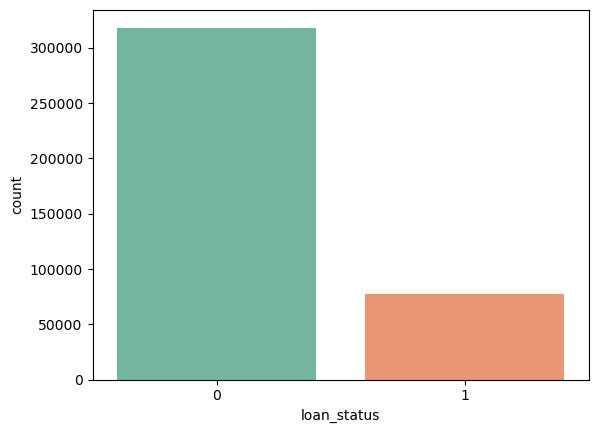

In [90]:
# Value count loan_status
vc_loanstatus = data["loan_status"].value_counts().to_frame()
vc_loanstatus["pct"] =  vc_loanstatus["loan_status"] / vc_loanstatus["loan_status"].sum()
vc_loanstatus["pct"] = pd.Series(["{0:.2f}%".format(val * 100) for val in vc_loanstatus["pct"]], index = vc_loanstatus.index)
display(vc_loanstatus)

# Plotting loan_status
sns.countplot(x=data["loan_status"], palette = "Set2")
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Loan status count')

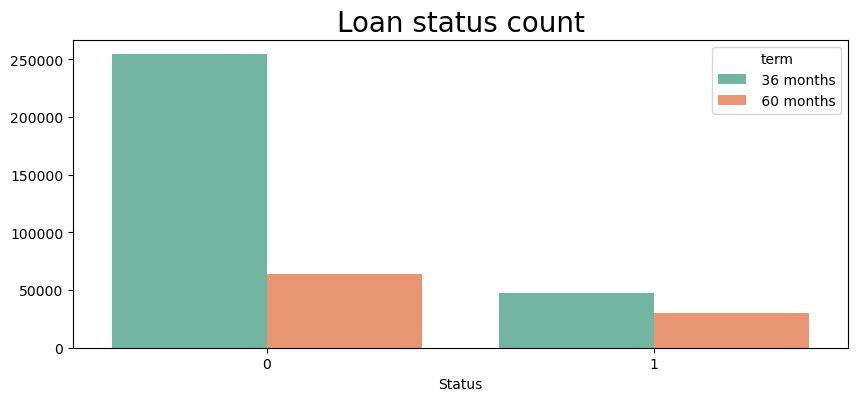

In [91]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=data,x="loan_status",hue="term",palette='Set2')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

Text(0.5, 1.0, 'Loan status count')

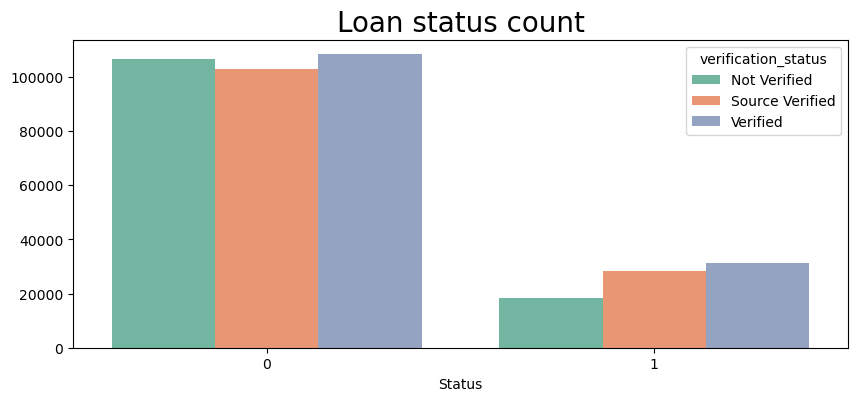

In [92]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=data,x="loan_status",hue="verification_status",palette='Set2')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

In [93]:
# data.to_excel("data_beforeCleaning.xlsx")  

#### Correlation of Variables
TBD:
* Correlation of ALL variables with target variable
* Correlation emp_title with annual_inc

**Correlation with Target Variable** -> TBD with ALL

In [94]:
# Correlation of variables with loan_status
cor_target = data.corrwith(data["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

loan_status             1.00
int_rate                0.25
revol_util              0.08
dti                     0.06
loan_amnt               0.06
installment             0.04
open_acc                0.03
pub_rec                 0.02
pub_rec_bankruptcies    0.01
revol_bal              -0.01
total_acc              -0.02
annual_inc             -0.05
mort_acc               -0.07
dtype: float64

**Correlation of numerical variables**

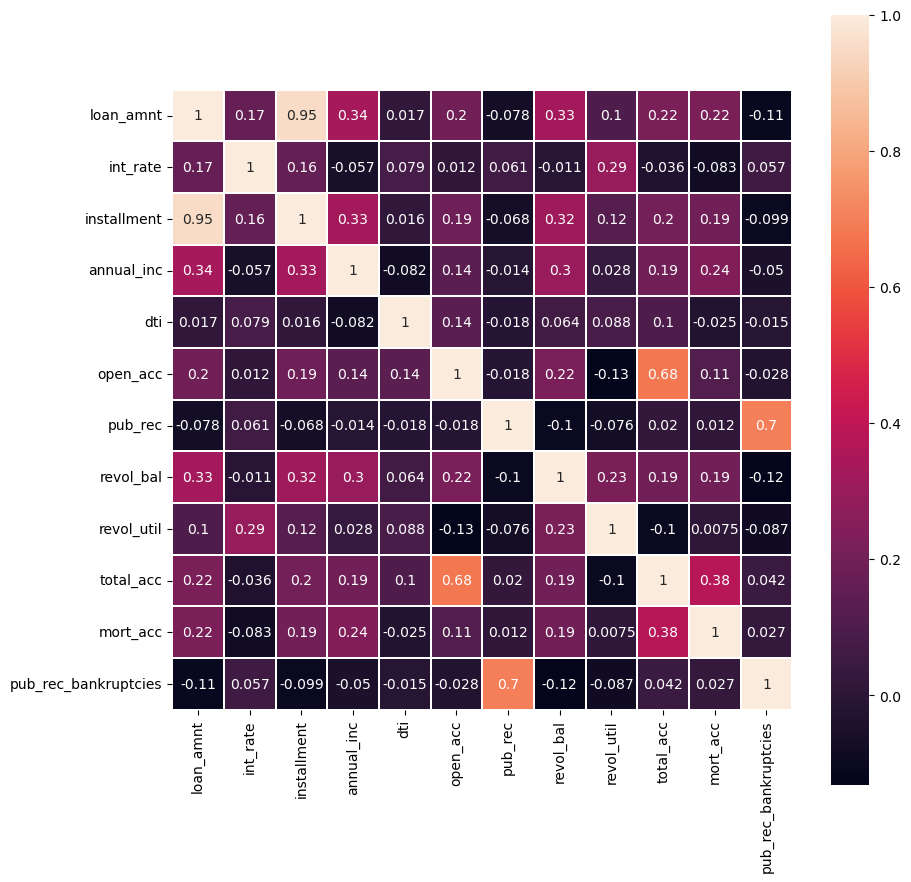

In [95]:
# only numeric variables (before normalization)
plt.figure(figsize=(10,10))
sns.heatmap(data_num.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

**Correlation between emp_title and annual_inc** -> TBD

In [96]:
# Spearman rank correlation coefficient
from scipy import stats

data_temp = data

# Replace NaN values of emp_title
mode = data_temp["emp_title"].mode()[0]                      # get mode of column
data_temp["emp_title"] = data_temp["emp_title"].fillna(mode)      # fill NaN with mode value

corr_coef, p_value = stats.spearmanr(data_temp["emp_title"], data_temp["annual_inc"])

print("Spearman rank correlation coefficient:", corr_coef)
print("p-value:", p_value)

# null hypothesis (no correlation)

Spearman rank correlation coefficient: -0.07262436589226029
p-value: 0.0


In [97]:
# OneHotEncoding 

emp_title_vc = data_temp["emp_title"].value_counts().to_frame()
emp_title_vc_n = emp_title_vc[emp_title_vc["emp_title"]>100] # only categories with vc > 100
e = emp_title_vc_n.index.to_list()
data_temp_e = data_temp[data_temp["emp_title"].isin(e)]
data_temp_e = data_temp_e[["emp_title", "annual_inc"]]
display(data_temp_e)


# one-hot encode the categorical variable
df_encoded = pd.get_dummies(data_temp_e, columns=['emp_title'])

# calculate correlation between encoded variable and numeric variable
corr_coef = df_encoded.corr()['annual_inc']
sorted_corr = corr_coef.sort_values(ascending=False)

# print correlation coefficient
print("Correlation coefficients:\n", sorted_corr)


,emp_title,annual_inc
18,Pilot,130580.00
19,Registered Nurse,85000.00
23,Office Manager,55000.00
24,Operations Manager,75000.00
26,Bartender,35000.00
...,...,...
396009,Officer,106000.00
396015,Teacher,57400.00
396017,teacher,41000.00
396023,Operations Manager,138000.00


Correlation coefficients:
 annual_inc                            1.00
emp_title_Managing Director           0.14
emp_title_Vice President              0.13
emp_title_Physician                   0.12
emp_title_Director                    0.10
                                      ... 
emp_title_Assistant Manager          -0.03
emp_title_Server                     -0.03
emp_title_Office Manager             -0.04
emp_title_Administrative Assistant   -0.04
emp_title_Teacher                    -0.17
Name: annual_inc, Length: 269, dtype: float64


OneHotEncoding Categorical Variables to get correlation between all variables

In [98]:
# # Separating numerical and categorical data
# data_num_corr = data.select_dtypes(include=['float64','int64'])
# data_cat_corr = data.select_dtypes(include=['object'])

# # Categorical columns positions
# cat_cols_corr = data_cat_corr.columns
# cat_cols_list_corr = cat_cols_corr.to_list()
# cat_col_positions_corr = [data.columns.get_loc(col) for col in cat_cols_corr]
# display(cat_col_positions_corr)
# display(cat_cols_list_corr)

In [99]:
# ## Check correlation between emp_title and income
# data_corr = data[["emp_title", "annual_inc"]]
# display(data_corr)

# # Separating numerical and categorical data
# data_num_corr = data_corr.select_dtypes(include=['float64','int64'])
# data_cat_corr = data_corr.select_dtypes(include=['object'])

# # Categorical columns positions
# cat_cols_corr = data_cat_corr.columns
# cat_cols_list_corr = cat_cols_corr.to_list()
# cat_col_positions_corr = [data_corr.columns.get_loc(col) for col in cat_cols_corr]
# display(cat_col_positions_corr)
# display(cat_cols_list_corr)

In [100]:
# # OneHotEncoding categorical columns
# ct_corr = ColumnTransformer(
#     [('ohe', pp.OneHotEncoder(sparse=False), cat_col_positions_corr),],     # the column numbers I want to apply this to
#     remainder='passthrough'                                                 # This leaves the rest of my columns in place
# )
# ct_transformed_corr = ct_corr.fit_transform(data_corr)
# data_corr = pd.DataFrame(ct_transformed_corr, columns=ct_corr.get_feature_names_out()) # putting array in a dataframe using column names
# data_corr

It calculates the correlation/strength-of-association of features in the data-set with both categorical and continuous features using: Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, Cramer’s V or Theil’s U for categorical-categorical cases.
associations function returns a dictionary that contains:

* ‘corr’ as key : A DataFrame of the correlation between all features.
* ‘ax’ as value: A matplotlib axe which contains the correlation heatmap.

In [101]:
# # associations(dataset, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', 
# #              bias_correction=True, nan_strategy=_REPLACE, nan_replace_value=_DEFAULT_REPLACE_VALUE, ax=None, figsize=None, annot=True, fmt='.2f', 
# #              cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

# complete_correlation_corr = associations(data, figsize=(10,10))

# df_complete_corr = complete_correlation_corr['corr']
# df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

### Dropping and adding Variables
*   Paper: If train/test split 70/30 -> don’t use variables having >= 30% missing values -> we could do that 
*   Dropping useless variables: 
    *  title -> purpose is summary of this
    * emp_title (maybe?) -> annual_inc might be correlated and more important
* Add/Create variables?
    * Macroeconomic information?




In [102]:
# Dropping useless variables
data_cleand = data.drop(['title','emp_title'], axis=1)

# Dropping variables having more than train_ratio% of nan values
train_ratio = 0.7
test_ratio = 0.3
data_cleand = data_cleand.loc[:, nans["nan_pct"] <= test_ratio]


In [103]:
# Splitting numerical and categorical variables
data_num_clean = data_cleand.select_dtypes(include=['float64','int64'])
data_cat_clean = data_cleand.select_dtypes(include=['object'])

### Data Visualizations 
* Distribution
* Boxplot

To visualize outliers and show in presentation
-> then outliers removed or winsorized


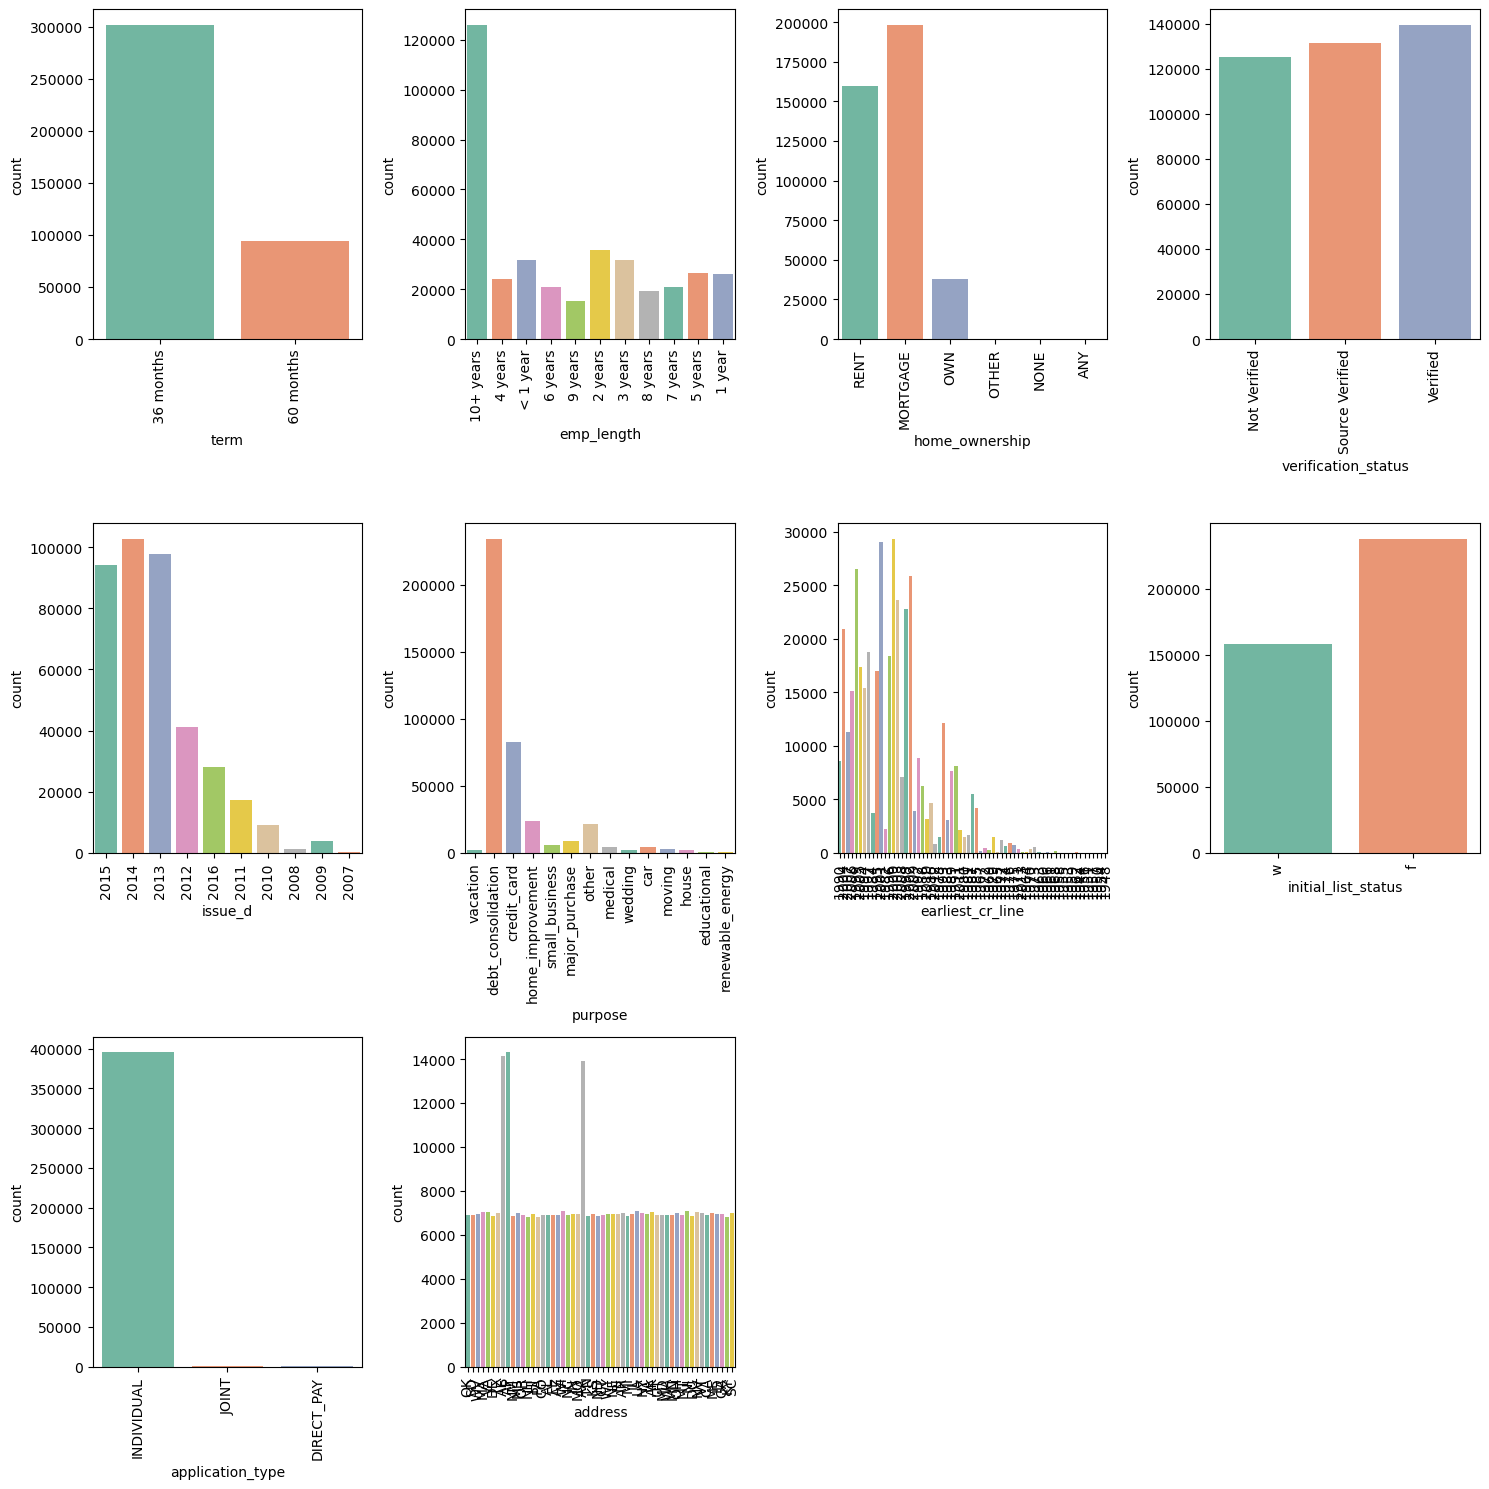

In [104]:
## Plotting Distribution for non-numeric data (only those that don't have many categories)

#dist_nn = ["term", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "initial_list_status", "application_type", "issue_d", "earliest_cr_line", "address"]
#dist_nn = ["term", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "initial_list_status", "application_type", "issue_d"]
dist_nn = data_cat_clean.columns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15), sharex = False, sharey = False)
axes = axes.ravel()  

for col, ax in zip(dist_nn, axes): 
    # absolute
    sns.countplot(data=data_cleand, x=col, palette = "Set2", ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.delaxes(axes[10])
fig.delaxes(axes[11])
fig.tight_layout()
plt.show()

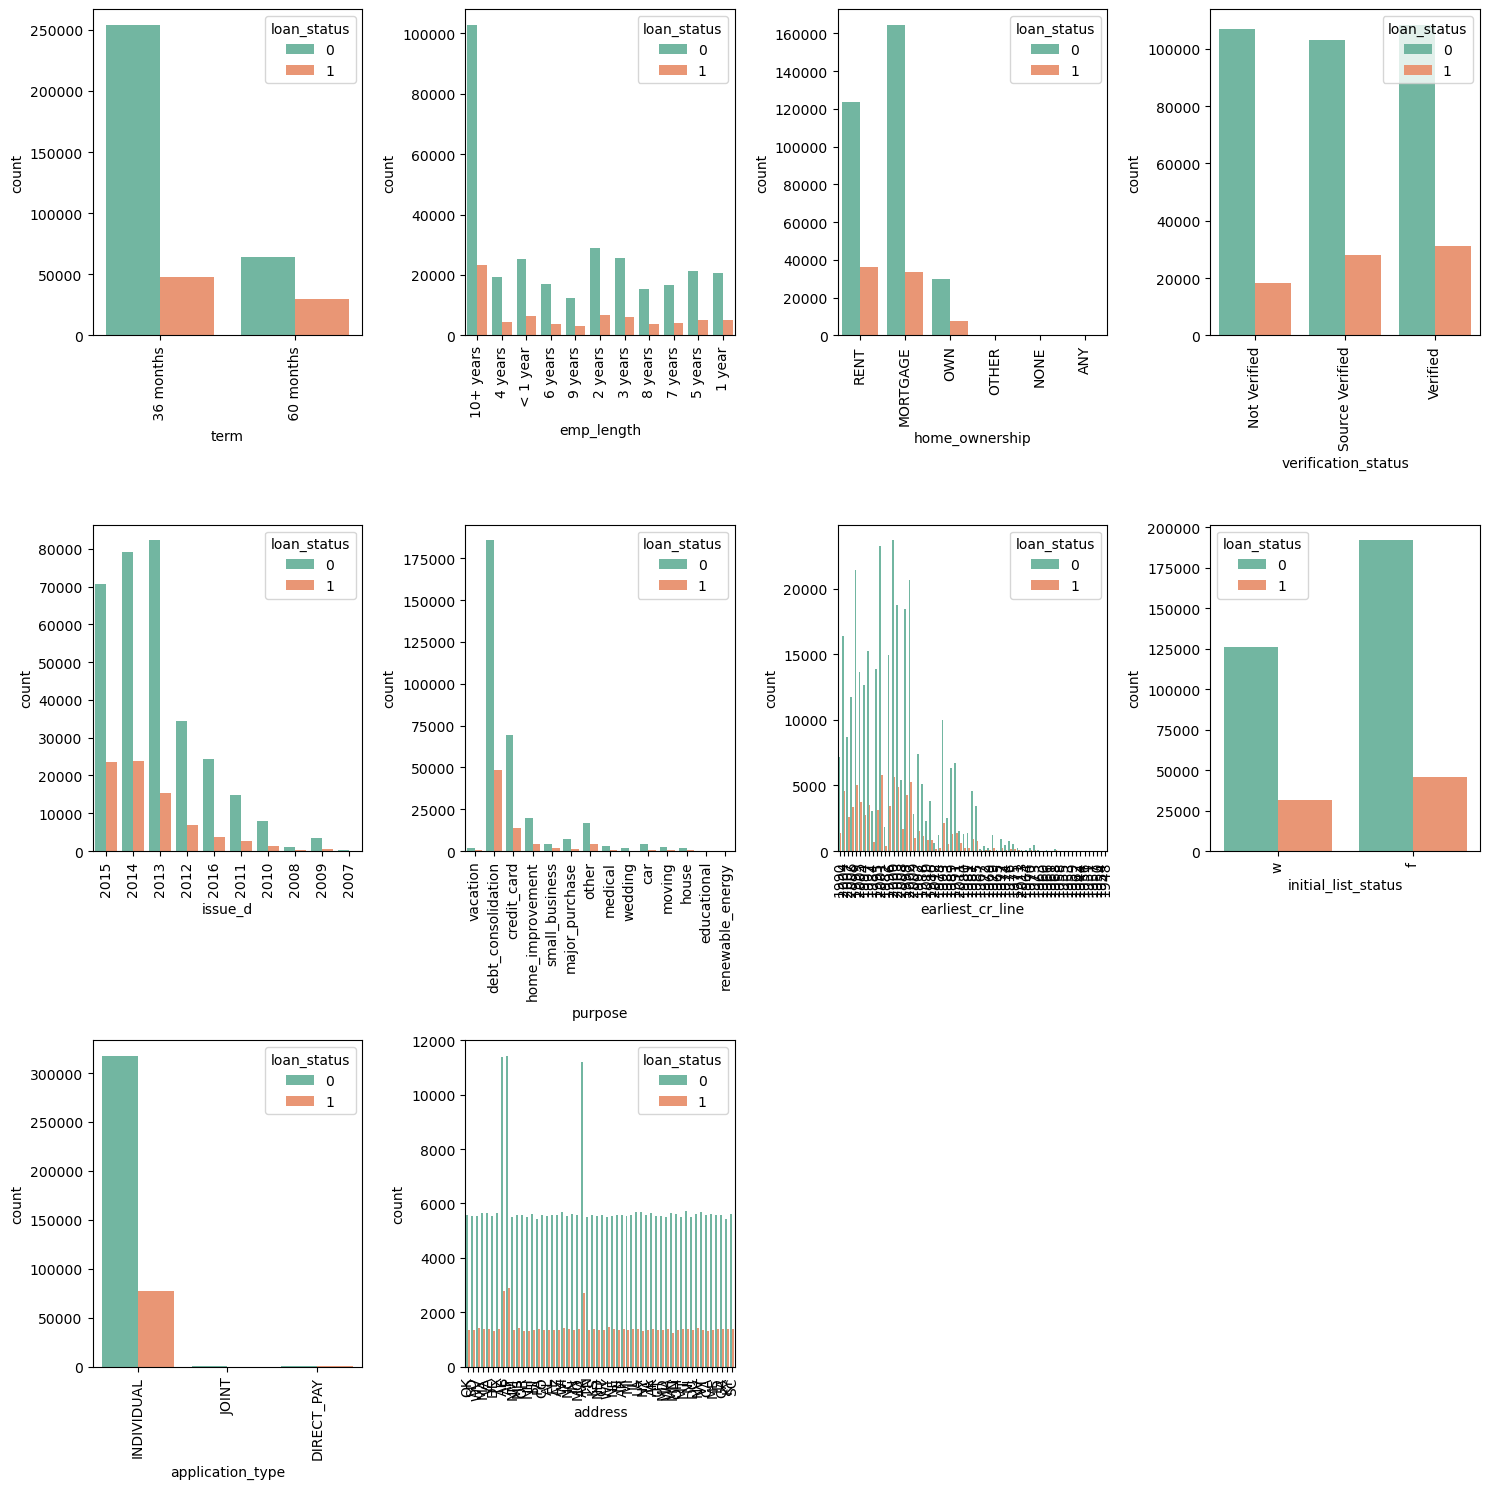

In [105]:
## Plotting Distribution for non-numeric data (only those that don't have many categories)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15), sharex = False, sharey = False)
axes = axes.ravel()  

for col, ax in zip(dist_nn, axes): 
    # default vs non-default
    sns.countplot(data=data_cleand, x=col, hue="loan_status", palette='Set2', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.delaxes(axes[11])   
fig.delaxes(axes[10])    
fig.tight_layout()
plt.show()

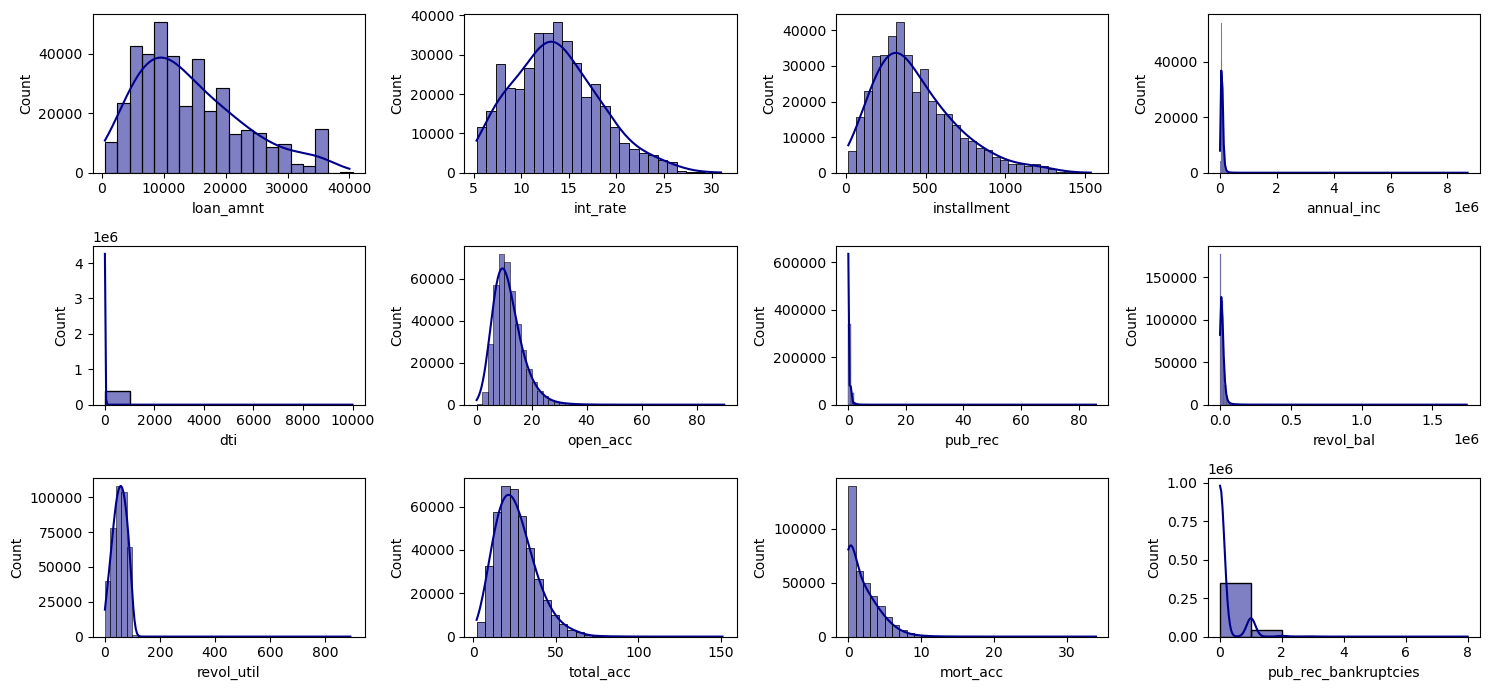

In [106]:
## Plotting Distribution for numeric data

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))

# loan_amnt -> right/positive skewed
sns.histplot(data=data_cleand, x="loan_amnt", binwidth=2000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,0])
# int_rate -> right/positive skewed
sns.histplot(data=data_cleand, x="int_rate", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,1])
# installment -> right/positive skewed
sns.histplot(data=data_cleand, x="installment", binwidth=50, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,2])
# annual_inc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="annual_inc", binwidth=10000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,3])
# dti -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="dti", binwidth=1000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,0])
# open_acc -> right/positive skewed
sns.histplot(data=data_cleand, x="open_acc", binwidth=2, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,1])
# pub_rec -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="pub_rec", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,2])
# revol_bal -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="revol_bal", binwidth=10000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,3])
# revol_util -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="revol_util", binwidth=20, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,0])
# total_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="total_acc", binwidth=5, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,1])
# mort_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="mort_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,2])
# pub_rec_bankruptcies
sns.histplot(data=data_cleand, x="pub_rec_bankruptcies", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,3])

fig.tight_layout()
plt.show()



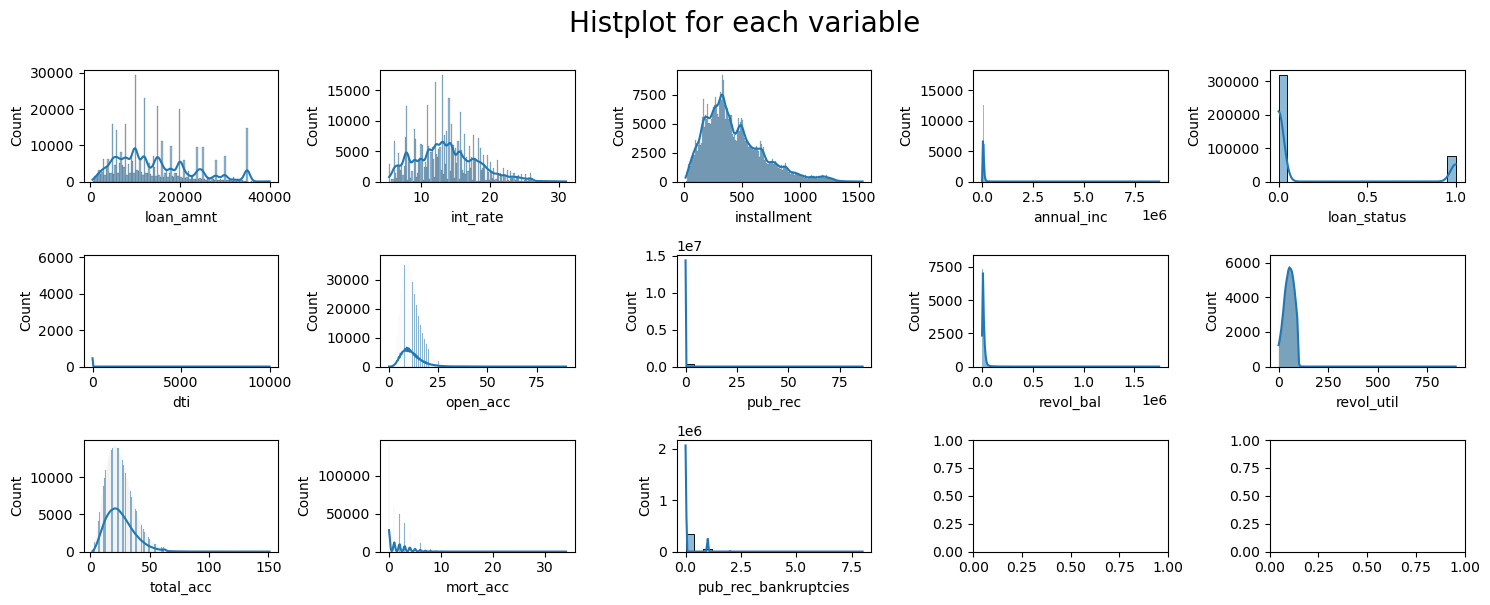

In [107]:
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)

num_cols = data_num_clean.columns[:]
histplot_visual(data=data_cleand,column=num_cols)
plt.tight_layout()

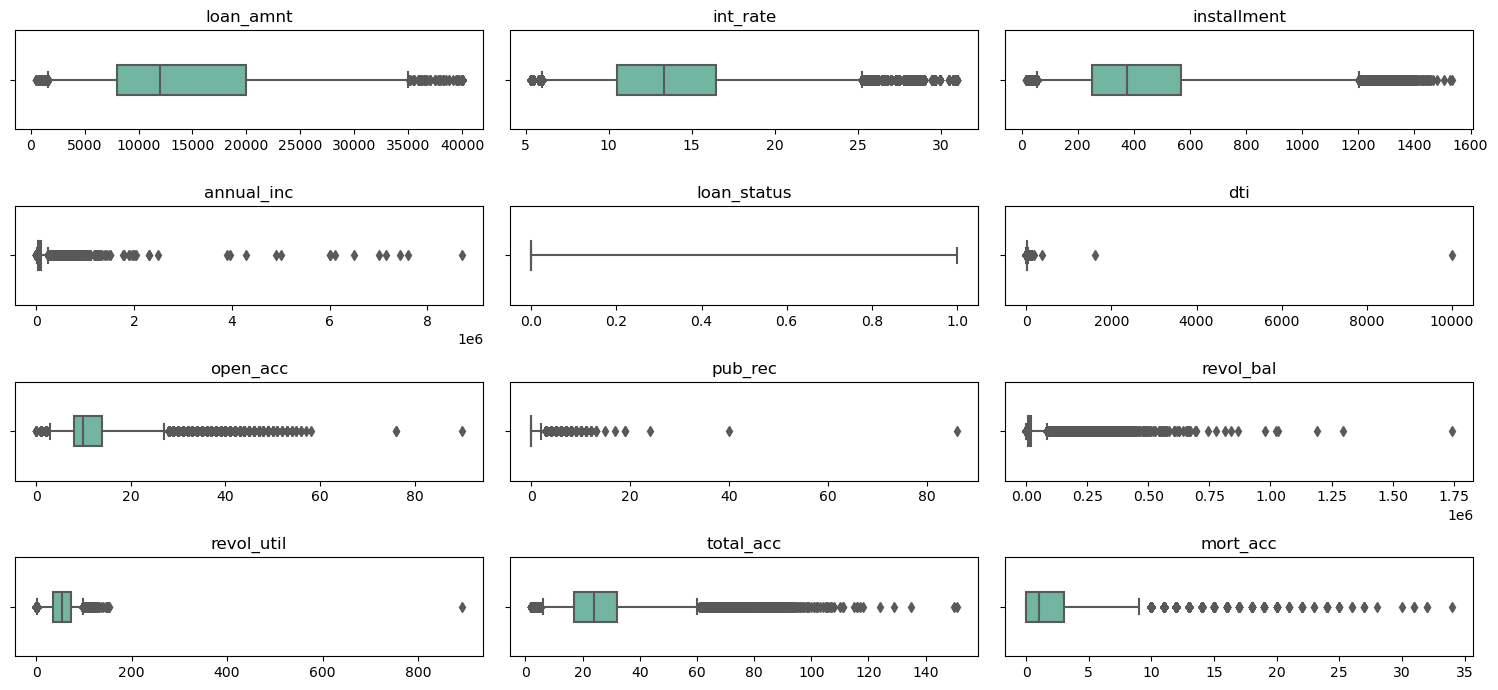

In [108]:
## Boxplot for numeric data

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = data_num_clean.columns[:]

for col, ax in zip(cols, axes):
  d = data_num_clean 
  sns.boxplot(data=d, x=col, orient = "h", palette = "Set2", width=0.3, whis=[1, 99], ax=ax) # Show the 1st and 99th percentiles
  ax.set(title=col, xlabel=None)

    
#fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

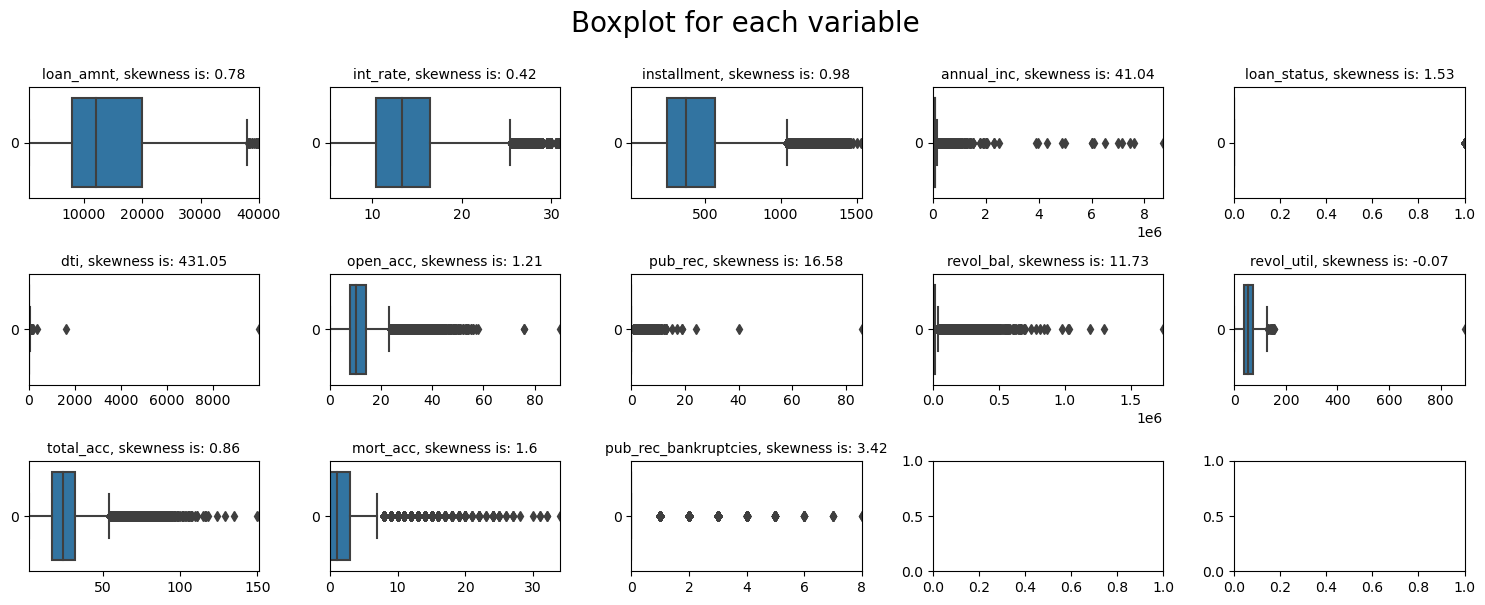

In [109]:
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])

boxplots_visual(data=data_cleand,column=num_cols)
plt.tight_layout()

#### Checking Distribution Stability (old)
Distributions not stable over time. 

In [110]:
# # Creating dataset subsets by issue_d year
# year_subsets = data_cleand.groupby('issue_d')
# year_subsets_num = data_cleand.select_dtypes(include=['float64','int64'])

# subsets = [] # list containing all subsets for different years (only numeric variables)
# years = []

# for year in year_subsets:
#     years.append(year[0])
#     ss_num = year[1].select_dtypes(include=['float64','int64']) # Taking only numeric columns
#     #print(year[0])
#     #display(year[1].describe())
#     subsets.append(ss_num) # append numeric dataframe to list

# #subsets[0].iloc[:,0]

In [111]:
# # Compare all distibrutions over time and print p-value for each of the coluumns 

# for i in range(len(year_subsets_num.columns)):  # for each variable
#     print(year_subsets_num.columns[i])

#     dist_list =[]

#     for y in range(len(subsets)): # for each year
#         d = subsets[y].iloc[:,i]
#         sns.kdeplot(d, shade=True, label=years[y])
#         dist_list.append(d)

#     # Show the plot
#     plt.legend()
#     plt.show()

#     # Create all possible pairs of subsets
#     pairs = list(itertools.combinations(dist_list, 2))

#     # Perform the Kolmogorov-Smirnov test on each pair of subsets
#     p_values = []
#     for pair in pairs:
#         test_statistic, p_value = ks_2samp(pair[0].values, pair[1].values)
#         p_values.append(p_value)

#     # Adjust the p-values for multiple testing using the Bonferroni correction
#     adjusted_p_values = [p * len(p_values) for p in p_values]

#     # Print the adjusted p-values
#     # print("Adjusted p-values:")
#     # for p in adjusted_p_values:
#     #     if p < 0.05:
#     #         print(p)

#     # print # p-valeus below 0.05 
#     count = len([x for x in adjusted_p_values if x < 0.05])
#     print("# Adjusted p-values below 0.05: ", count)




### Interpretation:
# H0: same distrib
# reject the null hypothesis in favor of the alternative if the p-value is less than 0.05

#  If any of the adjusted p-values is less than the chosen significance level (e.g., 0.05), we can conclude that the corresponding 
#    distributions are significantly different.
#  If the p-value is greater than our chosen significance level (e.g., 0.05), then we can conclude that the distribution is stable


#### Checking Distribution Stability (new)
Distributions not stable over time. 

In [112]:
# Creating dataset subsets by issue_d year
year_subsets = data_cleand.groupby('issue_d')
year_subsets_num = data_cleand.select_dtypes(include=['float64','int64'])

subsets = [] # list containing all subsets for different years (only numeric variables)
years = []

for year in year_subsets:
    years.append(year[0])
    ss_num = year[1].select_dtypes(include=['float64','int64']) # Taking only numeric columns
    #print(year[0])
    #display(year[1].describe())
    subsets.append(ss_num) # append numeric dataframe to list

#subsets[0].iloc[:,0]

loan_amnt
# Adjusted p-values below 0.05:  45
int_rate
# Adjusted p-values below 0.05:  45
installment
# Adjusted p-values below 0.05:  43
annual_inc
# Adjusted p-values below 0.05:  35
loan_status
# Adjusted p-values below 0.05:  22
dti
# Adjusted p-values below 0.05:  43
open_acc
# Adjusted p-values below 0.05:  35
pub_rec
# Adjusted p-values below 0.05:  26
revol_bal
# Adjusted p-values below 0.05:  38
revol_util
# Adjusted p-values below 0.05:  42
total_acc
# Adjusted p-values below 0.05:  39
mort_acc


C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_38436\3263517710.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d, shade=True, label=years[y], ax=axes[i])
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_38436\3263517710.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d, shade=True, label=years[y], ax=axes[i])
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_38436\3263517710.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d, shade=True, label=years[y], ax=axes[i])
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_38436\3263517710.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d, shade=True, label=years[y], ax=axes[i])


# Adjusted p-values below 0.05:  35
pub_rec_bankruptcies


C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_38436\3263517710.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d, shade=True, label=years[y], ax=axes[i])


# Adjusted p-values below 0.05:  37


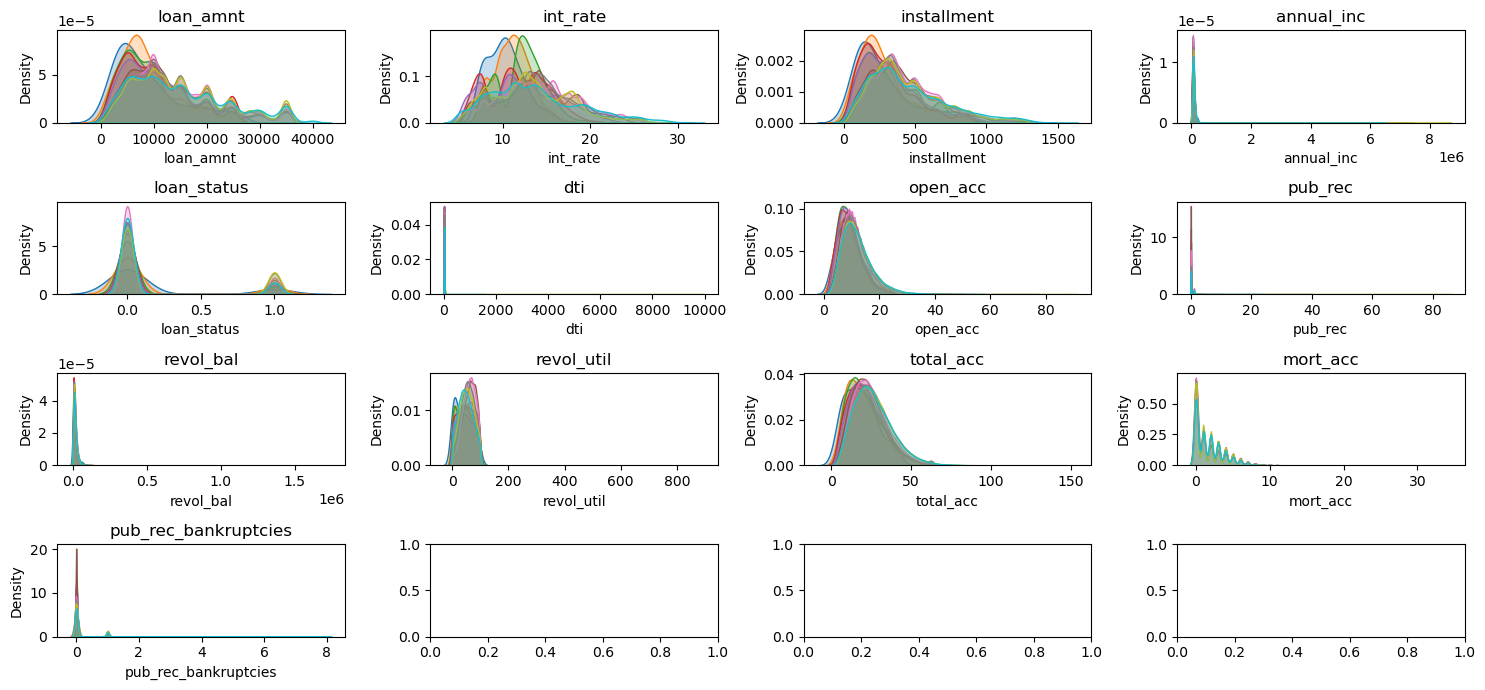

In [113]:
# Compare all distibrutions over time and print p-value for each of the coluumns 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7))
axes = axes.flatten()


for i in range(len(year_subsets_num.columns)):  # for each variable
    print(year_subsets_num.columns[i])

    dist_list =[]

    for y in range(len(subsets)): # for each year
        d = subsets[y].iloc[:,i]
        sns.kdeplot(d, shade=True, label=years[y], ax=axes[i])
        #sns.kdeplot(d, shade=True, label=years[y])
        dist_list.append(d)

    # plt.legend()
    # plt.show()
    axes[i].set_title(year_subsets_num.columns[i])

    # Create all possible pairs of subsets
    pairs = list(itertools.combinations(dist_list, 2))

    # Perform the Kolmogorov-Smirnov test on each pair of subsets
    p_values = []
    for pair in pairs:
        test_statistic, p_value = ks_2samp(pair[0].values, pair[1].values)
        p_values.append(p_value)

    # Adjust the p-values for multiple testing using the Bonferroni correction
    adjusted_p_values = [p * len(p_values) for p in p_values]

    # Print the adjusted p-values
    # print("Adjusted p-values:")
    # for p in adjusted_p_values:
    #     if p < 0.05:
    #         print(p)

    # print # p-valeus below 0.05 
    count = len([x for x in adjusted_p_values if x < 0.05])
    print("# Adjusted p-values below 0.05: ", count)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



### Interpretation:
# H0: same distrib
# reject the null hypothesis in favor of the alternative if the p-value is less than 0.05

#  If any of the adjusted p-values is less than the chosen significance level (e.g., 0.05), we can conclude that the corresponding 
#    distributions are significantly different.
#  If the p-value is greater than our chosen significance level (e.g., 0.05), then we can conclude that the distribution is stable


In [114]:
# data_cleand
# data_num_clean
# data_cat_clean

### Outliers 




**Outlier Detection:** https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/ 

**Outlier Handling:** https://heartbeat.comet.ml/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07 

* Try out different methods

* Delete outliers or winsorize them \
-> Reduces sensitivity of model to outliers 

In [115]:
data_num_clean.skew()

loan_amnt                0.78
int_rate                 0.42
installment              0.98
annual_inc              41.04
loan_status              1.53
dti                    431.05
open_acc                 1.21
pub_rec                 16.58
revol_bal               11.73
revol_util              -0.07
total_acc                0.86
mort_acc                 1.60
pub_rec_bankruptcies     3.42
dtype: float64

#### Winsorization
For example, a 90% winsorization sets all observations greater than the 95th percentile equal to the value at the 95th percentile and all observations less than the 5th percentile equal to the value at the 5th percentile. \
-> If no extreme outliers are present, winsorization may be unnecessary \
-> one-sided here?

limits: Tuple of the percentages to cut on each side of the array \
-> 0% of data of lowest values are replaced \
-> 1% of data of highest values are replaced \
-> because most features strongly right skewed \


https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

In [116]:
## Winsorization (if extreme outliers)

data_temp = data_cleand
data_cleaned_win = data_cleand.copy(deep=True)

num_col_list = data_num_clean.columns.to_list()
num_col_list.remove("loan_status")


# Winsorize on right-tail
for col in num_col_list:
    data_cleaned_win[col] = winsorize(data_temp[col], limits=(0, 0.01))

data_cleaned_win.describe()


c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,358234.00,396029.00
mean,14111.29,13.63,431.30,72904.52,0.20,17.33,11.26,0.17,15186.24,53.80,25.35,1.81,0.12
std,8350.21,4.44,248.95,40490.15,0.40,8.07,4.94,0.42,14155.26,24.40,11.64,2.15,0.32
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,0.00,11.28,8.00,0.00,6025.00,35.90,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,0.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,0.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,35000.00,25.28,1202.46,250000.00,1.00,36.43,27.00,2.00,86046.00,98.20,60.00,34.00,1.00


In [117]:
data_cleaned_win.skew()

loan_amnt               0.77
int_rate                0.38
installment             0.94
annual_inc              1.74
issue_d                -0.77
loan_status             1.53
dti                     0.21
earliest_cr_line       -1.07
open_acc                0.87
pub_rec                 2.56
revol_bal               2.34
revol_util             -0.18
total_acc               0.69
mort_acc                1.60
pub_rec_bankruptcies    2.41
dtype: float64

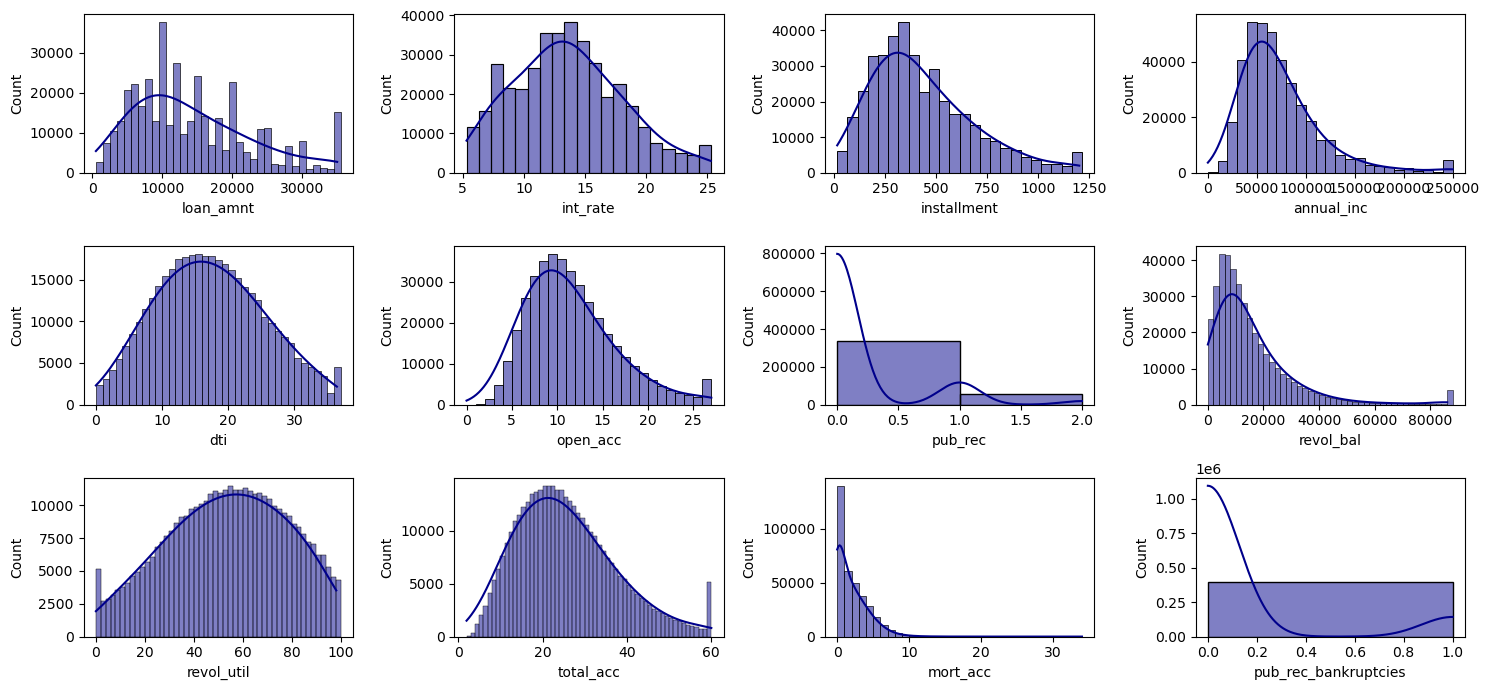

In [118]:
## Plotting Distribution for numeric data

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))

d = data_cleaned_win

# loan_amnt -> right/positive skewed
sns.histplot(data=d, x="loan_amnt", binwidth=1000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,0])
# int_rate -> right/positive skewed
sns.histplot(data=d, x="int_rate", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,1])
# installment -> right/positive skewed
sns.histplot(data=d, x="installment", binwidth=50, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,2])
# annual_inc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="annual_inc", binwidth=10000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,3])
# dti -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="dti", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,0])
# open_acc -> right/positive skewed
sns.histplot(data=d, x="open_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,1])
# pub_rec -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="pub_rec", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,2])
# revol_bal -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="revol_bal", binwidth=2000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,3])
# revol_util -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="revol_util", binwidth=2, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,0])
# total_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="total_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,1])
# mort_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="mort_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,2])
# pub_rec_bankruptcies
sns.histplot(data=d, x="pub_rec_bankruptcies", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,3])

fig.tight_layout()
plt.show()

In [119]:
# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
# axes = axes.ravel()  
# cols = data_cleaned_win.select_dtypes(include=['float64', 'int64']).columns[:]

# for col, ax in zip(cols, axes):
#     d = data_cleaned_win.select_dtypes(include=['float64', 'int64'])
#     sns.kdeplot(data=d, x=col, shade=True, ax=ax)
#     ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
# #fig.delaxes(axes[8])
# fig.tight_layout()
# plt.show()

In [120]:
# data_cleaned_win

### Missing and wrong values 
* Wrong row was already deleted. 
* Numeric NaN values: Replacing nan values with column means
* Non-numeric NaN values: Replacing nan values with category that has highes value count (mode)

In [121]:
data_cleand_win_nan = data_cleaned_win

## Numeric data: Replacing nan values with column means 

for col in data_cleand_win_nan.select_dtypes(include=['float64', 'int64']).columns:
    data_cleand_win_nan[col] = data_cleand_win_nan[col].fillna(data_cleand_win_nan[col].median())


## Non-Numeric data: Replacing nan values with category that has highes value count? (emp_title, emp_length, title)

# loop through each column and replace NaN with mode
for col in data_cleand_win_nan.select_dtypes(include=['object']).columns:
        mode = data_cleand_win_nan[col].mode()[0]                   # get mode of column
        data_cleand_win_nan[col] = data_cleand_win_nan[col].fillna(mode)    # fill NaN with mode value

data_cleand_win_nan.describe()

c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00
mean,14111.29,13.63,431.30,72904.52,0.20,17.33,11.26,0.17,15186.24,53.80,25.35,1.74,0.12
std,8350.21,4.44,248.95,40490.15,0.40,8.07,4.94,0.42,14155.26,24.40,11.64,2.06,0.32
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,0.00,11.28,8.00,0.00,6025.00,35.90,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,0.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,0.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,35000.00,25.28,1202.46,250000.00,1.00,36.43,27.00,2.00,86046.00,98.20,60.00,34.00,1.00


In [122]:
# Value count for categorical data
data_cat_clean_win_nan = data_cleand_win_nan.select_dtypes(include=['object'])

vcs = dict()

for col in data_cat_clean_win_nan.columns:
    vc = data_cleand_win_nan[col].value_counts().to_frame()
    vc["pct"] =  vc[col] / vc[col].sum()
    vc["pct"] = pd.Series(["{0:.2f}%".format(val * 100) for val in vc["pct"]], index = vc.index)
    vcs["vc {0}".format(col)] = vc
    display(vc)

,term,pct
36 months,302004,76.26%
60 months,94025,23.74%


,emp_length,pct
10+ years,144341,36.45%
2 years,35827,9.05%
< 1 year,31725,8.01%
3 years,31665,8.00%
5 years,26495,6.69%
1 year,25882,6.54%
4 years,23952,6.05%
6 years,20841,5.26%
7 years,20819,5.26%
8 years,19168,4.84%


,home_ownership,pct
MORTGAGE,198347,50.08%
RENT,159790,40.35%
OWN,37746,9.53%
OTHER,112,0.03%
NONE,31,0.01%
ANY,3,0.00%


,verification_status,pct
Verified,139563,35.24%
Source Verified,131385,33.18%
Not Verified,125081,31.58%


,issue_d,pct
2014,102859,25.97%
2013,97662,24.66%
2015,94264,23.80%
2012,41202,10.40%
2016,28088,7.09%
2011,17435,4.40%
2010,9258,2.34%
2009,3826,0.97%
2008,1240,0.31%
2007,195,0.05%


,purpose,pct
debt_consolidation,234507,59.21%
credit_card,83019,20.96%
home_improvement,24029,6.07%
other,21185,5.35%
major_purchase,8790,2.22%
small_business,5701,1.44%
car,4697,1.19%
medical,4196,1.06%
moving,2854,0.72%
vacation,2452,0.62%


,earliest_cr_line,pct
2000,29366,7.42%
2001,29083,7.34%
1999,26491,6.69%
2002,25901,6.54%
2003,23657,5.97%
...,...,...
1951,3,0.00%
1950,3,0.00%
1953,2,0.00%
1944,1,0.00%


,initial_list_status,pct
f,238065,60.11%
w,157964,39.89%


,application_type,pct
INDIVIDUAL,395318,99.82%
JOINT,425,0.11%
DIRECT_PAY,286,0.07%


,address,pct
AP,14308,3.61%
AE,14157,3.57%
AA,13919,3.51%
NJ,7091,1.79%
WI,7081,1.79%
LA,7068,1.78%
NV,7038,1.78%
AK,7034,1.78%
MA,7022,1.77%
VA,7022,1.77%


In [123]:
## Count NaN again
# compute number of NaN values and percentage of NaN values for each column
nan_count2 = data_cleand_win_nan.isna().sum()
nan_pct2 = data_cleand_win_nan.isna().sum()/n_data

# create a new dataframe to store the results
nans2 = pd.DataFrame({'nan_count': nan_count2, 'nan_pct': nan_pct2})
nans2["nan_pct_str"] = pd.Series(["{0:.2f}%".format(val * 100) for val in nans2["nan_pct"]], index = nans2.index)
nans2

,nan_count,nan_pct,nan_pct_str
loan_amnt,0,0.00,0.00%
term,0,0.00,0.00%
int_rate,0,0.00,0.00%
installment,0,0.00,0.00%
emp_length,0,0.00,0.00%
home_ownership,0,0.00,0.00%
annual_inc,0,0.00,0.00%
verification_status,0,0.00,0.00%
issue_d,0,0.00,0.00%
loan_status,0,0.00,0.00%


In [124]:
# data_cleand_win_nan

### Adding Macroeconomic Variables

In [159]:
## Adding Macro Variables

folder_macro = os.path.join(os.getcwd(), "Data_macro/")
file_macro = "Macro_data.xlsx"
data_macro = pd.read_excel(folder_macro+file_macro)
data_macro['issue_d'] = data_macro['issue_d'].astype(str)
data_macro = data_macro.set_index("issue_d")
#data_macro = data_macro.astype(str)
display(data_macro)

dict_macro = data_macro.to_dict()

data_with_macro = data_cleand_win_nan

new_var = ['real_GDP_growth', 'unemployment_rate', 'inflation_rate', 'interest_rate']

for nv in new_var:
    data_with_macro[nv] = data_with_macro['issue_d'].map(dict_macro[nv])

data_cleand_win_nan

,real_GDP_growth,unemployment_rate,inflation_rate,interest_rate
issue_d,,,,
2007,0.02,0.05,0.03,0.05
2008,0.00,0.06,0.04,0.02
2009,-0.03,0.09,-0.00,0.00
2010,0.03,0.10,0.02,0.00
2011,0.02,0.09,0.03,0.00
2012,0.02,0.08,0.02,0.00
2013,0.02,0.07,0.01,0.00
2014,0.02,0.06,0.02,0.00
2015,0.03,0.05,0.00,0.00


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,real_GDP_growth,unemployment_rate,inflation_rate,interest_rate
0,10000,36 months,11.44,329.48,10+ years,RENT,117000.00,Not Verified,2015,0,vacation,26.24,1990,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00,OK,0.03,0.05,0.00,0.00
1,8000,36 months,11.99,265.68,4 years,MORTGAGE,65000.00,Not Verified,2015,0,debt_consolidation,22.05,2004,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00,SD,0.03,0.05,0.00,0.00
2,15600,36 months,10.49,506.97,< 1 year,RENT,43057.00,Source Verified,2015,0,credit_card,12.79,2007,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00,WV,0.03,0.05,0.00,0.00
3,7200,36 months,6.49,220.65,6 years,RENT,54000.00,Not Verified,2014,0,credit_card,2.60,2006,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00,MA,0.02,0.06,0.02,0.00
4,24375,60 months,17.27,609.33,9 years,MORTGAGE,55000.00,Verified,2013,1,credit_card,33.95,1999,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00,VA,0.02,0.07,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,2 years,RENT,40000.00,Source Verified,2015,0,debt_consolidation,15.63,2004,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00,DC,0.03,0.05,0.00,0.00
396026,21000,36 months,12.29,700.42,5 years,MORTGAGE,110000.00,Source Verified,2015,0,debt_consolidation,21.45,2006,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00,LA,0.03,0.05,0.00,0.00
396027,5000,36 months,9.99,161.32,10+ years,RENT,56500.00,Verified,2013,0,debt_consolidation,17.56,1997,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00,NY,0.02,0.07,0.01,0.00
396028,21000,60 months,15.31,503.02,10+ years,MORTGAGE,64000.00,Verified,2012,0,debt_consolidation,15.88,1990,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00,FL,0.02,0.08,0.02,0.00


### Dealing with Categorical Data 
Create Dummies for categorical Data. \
-> OneHotEncoding: https://towardsdatascience.com/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee

Problem with OHE because of:
* earliest_cr_line 
* address 


OneHotEncoder

In [161]:
data_cleand = data_cleand_win_nan      

In [162]:
# Separating numerical and categorical data
data_num_final = data_cleand.select_dtypes(include=['float64','int64'])
data_cat_final = data_cleand.select_dtypes(include=['object'])

In [163]:
# Categorical columns positions
cat_cols = data_cat_final.columns
cat_cols_list = cat_cols.to_list()
cat_col_positions = [data_cleand.columns.get_loc(col) for col in cat_cols]
display(cat_col_positions)
display(cat_cols_list)

[1, 4, 5, 7, 8, 10, 12, 18, 19, 22]

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [164]:
# OneHotEncoding categorical columns
ct = ColumnTransformer(
    [('ohe', pp.OneHotEncoder(sparse=False), cat_col_positions),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
ct_transformed = ct.fit_transform(data_cleand)
data_final = pd.DataFrame(ct_transformed, columns=ct.get_feature_names_out()) # putting array in a dataframe using column names
data_final

,ohe__term_ 36 months,ohe__term_ 60 months,ohe__emp_length_1 year,ohe__emp_length_10+ years,ohe__emp_length_2 years,ohe__emp_length_3 years,ohe__emp_length_4 years,ohe__emp_length_5 years,ohe__emp_length_6 years,ohe__emp_length_7 years,ohe__emp_length_8 years,ohe__emp_length_9 years,ohe__emp_length_< 1 year,ohe__home_ownership_ANY,ohe__home_ownership_MORTGAGE,ohe__home_ownership_NONE,ohe__home_ownership_OTHER,ohe__home_ownership_OWN,ohe__home_ownership_RENT,ohe__verification_status_Not Verified,ohe__verification_status_Source Verified,ohe__verification_status_Verified,ohe__issue_d_2007,ohe__issue_d_2008,ohe__issue_d_2009,ohe__issue_d_2010,ohe__issue_d_2011,ohe__issue_d_2012,ohe__issue_d_2013,ohe__issue_d_2014,ohe__issue_d_2015,ohe__issue_d_2016,ohe__purpose_car,ohe__purpose_credit_card,ohe__purpose_debt_consolidation,ohe__purpose_educational,ohe__purpose_home_improvement,ohe__purpose_house,ohe__purpose_major_purchase,ohe__purpose_medical,ohe__purpose_moving,ohe__purpose_other,ohe__purpose_renewable_energy,ohe__purpose_small_business,ohe__purpose_vacation,ohe__purpose_wedding,ohe__earliest_cr_line_1944,ohe__earliest_cr_line_1948,ohe__earliest_cr_line_1950,ohe__earliest_cr_line_1951,ohe__earliest_cr_line_1953,ohe__earliest_cr_line_1954,ohe__earliest_cr_line_1955,ohe__earliest_cr_line_1956,ohe__earliest_cr_line_1957,ohe__earliest_cr_line_1958,ohe__earliest_cr_line_1959,ohe__earliest_cr_line_1960,ohe__earliest_cr_line_1961,ohe__earliest_cr_line_1962,ohe__earliest_cr_line_1963,ohe__earliest_cr_line_1964,ohe__earliest_cr_line_1965,ohe__earliest_cr_line_1966,ohe__earliest_cr_line_1967,ohe__earliest_cr_line_1968,ohe__earliest_cr_line_1969,ohe__earliest_cr_line_1970,ohe__earliest_cr_line_1971,ohe__earliest_cr_line_1972,ohe__earliest_cr_line_1973,ohe__earliest_cr_line_1974,ohe__earliest_cr_line_1975,ohe__earliest_cr_line_1976,ohe__earliest_cr_line_1977,ohe__earliest_cr_line_1978,ohe__earliest_cr_line_1979,ohe__earliest_cr_line_1980,ohe__earliest_cr_line_1981,ohe__earliest_cr_line_1982,ohe__earliest_cr_line_1983,ohe__earliest_cr_line_1984,ohe__earliest_cr_line_1985,ohe__earliest_cr_line_1986,ohe__earliest_cr_line_1987,ohe__earliest_cr_line_1988,ohe__earliest_cr_line_1989,ohe__earliest_cr_line_1990,ohe__earliest_cr_line_1991,ohe__earliest_cr_line_1992,ohe__earliest_cr_line_1993,ohe__earliest_cr_line_1994,ohe__earliest_cr_line_1995,ohe__earliest_cr_line_1996,ohe__earliest_cr_line_1997,ohe__earliest_cr_line_1998,ohe__earliest_cr_line_1999,ohe__earliest_cr_line_2000,ohe__earliest_cr_line_2001,ohe__earliest_cr_line_2002,ohe__earliest_cr_line_2003,ohe__earliest_cr_line_2004,ohe__earliest_cr_line_2005,ohe__earliest_cr_line_2006,ohe__earliest_cr_line_2007,ohe__earliest_cr_line_2008,ohe__earliest_cr_line_2009,ohe__earliest_cr_line_2010,ohe__earliest_cr_line_2011,ohe__earliest_cr_line_2012,ohe__earliest_cr_line_2013,ohe__initial_list_status_f,ohe__initial_list_status_w,ohe__application_type_DIRECT_PAY,ohe__application_type_INDIVIDUAL,ohe__application_type_JOINT,ohe__address_AA,ohe__address_AE,ohe__address_AK,ohe__address_AL,ohe__address_AP,ohe__address_AR,ohe__address_AZ,ohe__address_CA,ohe__address_CO,ohe__address_CT,ohe__address_DC,ohe__address_DE,ohe__address_FL,ohe__address_GA,ohe__address_HI,ohe__address_IA,ohe__address_ID,ohe__address_IL,ohe__address_IN,ohe__address_KS,ohe__address_KY,ohe__address_LA,ohe__address_MA,ohe__address_MD,ohe__address_ME,ohe__address_MI,ohe__address_MN,ohe__address_MO,ohe__address_MS,ohe__address_MT,ohe__address_NC,ohe__address_ND,ohe__address_NE,ohe__address_NH,ohe__address_NJ,ohe__address_NM,ohe__address_NV,ohe__address_NY,ohe__address_OH,ohe__address_OK,ohe__address_OR,ohe__address_PA,ohe__address_RI,ohe__address_SC,ohe__address_SD,ohe__address_TN,ohe__address_TX,ohe__address_UT,ohe__address_VA,ohe__address_VT,ohe__address_WA,ohe__address_WI,ohe__address_WV,ohe__address_WY,remainder__loan_amnt,remainder__int_rate,remainder__installment,remainder__annual_inc,remainder__loan_status,remainder__dti,remainder__open_a

In [130]:
# data_final

### Data Normalization

In [165]:
scaler = MinMaxScaler()
scaler.fit(data_final)
scaled = scaler.fit_transform(data_final)
data_final_scaled = pd.DataFrame(scaled, columns=data_final.columns)

In [166]:
num_cols = [col for col in data_final_scaled.columns if 'remainder' in col]
cat_cols = [col for col in data_final_scaled.columns if 'remainder' not in col]

In [133]:
# data_final_scaled

### Data Standardization 

In [134]:
# from sklearn.preprocessing import StandardScaler

# scaler_std = StandardScaler()

# standardized_data = scaler_std.fit_transform(data_final_scaled)

# data_final_scaled_std = pd.DataFrame(standardized_data, columns=data_final.columns)
# data_final_scaled_std

### Final datasets

In [135]:
# data_final            -> not normalized, not standardized
# data_final_scaled     -> normalized
# data_final_scaled_std -> normalized, standardized

## Correlation Analysis Variables
Find and drop highly correlated variables

In [167]:
# Create correlation matrix
corr_matrix = data_final_scaled.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # >= 0.8 -> 5
display(to_drop)

# don't drop macro variables
macro_vars = ["remainder__real_GDP_growth", "remainder__unemployment_rate", "remainder__inflation_rate", "remainder__interest_rate"]
for v in macro_vars:
    if v in to_drop: to_drop.remove(v)
display(to_drop)

# Drop features 
data_final_scaled = data_final_scaled.drop(to_drop, axis=1, inplace=False)
data_final_scaled

['ohe__term_ 60 months',
 'ohe__home_ownership_RENT',
 'ohe__initial_list_status_w',
 'remainder__installment',
 'remainder__inflation_rate']

['ohe__term_ 60 months',
 'ohe__home_ownership_RENT',
 'ohe__initial_list_status_w',
 'remainder__installment']

,ohe__term_ 36 months,ohe__emp_length_1 year,ohe__emp_length_10+ years,ohe__emp_length_2 years,ohe__emp_length_3 years,ohe__emp_length_4 years,ohe__emp_length_5 years,ohe__emp_length_6 years,ohe__emp_length_7 years,ohe__emp_length_8 years,ohe__emp_length_9 years,ohe__emp_length_< 1 year,ohe__home_ownership_ANY,ohe__home_ownership_MORTGAGE,ohe__home_ownership_NONE,ohe__home_ownership_OTHER,ohe__home_ownership_OWN,ohe__verification_status_Not Verified,ohe__verification_status_Source Verified,ohe__verification_status_Verified,ohe__issue_d_2007,ohe__issue_d_2008,ohe__issue_d_2009,ohe__issue_d_2010,ohe__issue_d_2011,ohe__issue_d_2012,ohe__issue_d_2013,ohe__issue_d_2014,ohe__issue_d_2015,ohe__issue_d_2016,ohe__purpose_car,ohe__purpose_credit_card,ohe__purpose_debt_consolidation,ohe__purpose_educational,ohe__purpose_home_improvement,ohe__purpose_house,ohe__purpose_major_purchase,ohe__purpose_medical,ohe__purpose_moving,ohe__purpose_other,ohe__purpose_renewable_energy,ohe__purpose_small_business,ohe__purpose_vacation,ohe__purpose_wedding,ohe__earliest_cr_line_1944,ohe__earliest_cr_line_1948,ohe__earliest_cr_line_1950,ohe__earliest_cr_line_1951,ohe__earliest_cr_line_1953,ohe__earliest_cr_line_1954,ohe__earliest_cr_line_1955,ohe__earliest_cr_line_1956,ohe__earliest_cr_line_1957,ohe__earliest_cr_line_1958,ohe__earliest_cr_line_1959,ohe__earliest_cr_line_1960,ohe__earliest_cr_line_1961,ohe__earliest_cr_line_1962,ohe__earliest_cr_line_1963,ohe__earliest_cr_line_1964,ohe__earliest_cr_line_1965,ohe__earliest_cr_line_1966,ohe__earliest_cr_line_1967,ohe__earliest_cr_line_1968,ohe__earliest_cr_line_1969,ohe__earliest_cr_line_1970,ohe__earliest_cr_line_1971,ohe__earliest_cr_line_1972,ohe__earliest_cr_line_1973,ohe__earliest_cr_line_1974,ohe__earliest_cr_line_1975,ohe__earliest_cr_line_1976,ohe__earliest_cr_line_1977,ohe__earliest_cr_line_1978,ohe__earliest_cr_line_1979,ohe__earliest_cr_line_1980,ohe__earliest_cr_line_1981,ohe__earliest_cr_line_1982,ohe__earliest_cr_line_1983,ohe__earliest_cr_line_1984,ohe__earliest_cr_line_1985,ohe__earliest_cr_line_1986,ohe__earliest_cr_line_1987,ohe__earliest_cr_line_1988,ohe__earliest_cr_line_1989,ohe__earliest_cr_line_1990,ohe__earliest_cr_line_1991,ohe__earliest_cr_line_1992,ohe__earliest_cr_line_1993,ohe__earliest_cr_line_1994,ohe__earliest_cr_line_1995,ohe__earliest_cr_line_1996,ohe__earliest_cr_line_1997,ohe__earliest_cr_line_1998,ohe__earliest_cr_line_1999,ohe__earliest_cr_line_2000,ohe__earliest_cr_line_2001,ohe__earliest_cr_line_2002,ohe__earliest_cr_line_2003,ohe__earliest_cr_line_2004,ohe__earliest_cr_line_2005,ohe__earliest_cr_line_2006,ohe__earliest_cr_line_2007,ohe__earliest_cr_line_2008,ohe__earliest_cr_line_2009,ohe__earliest_cr_line_2010,ohe__earliest_cr_line_2011,ohe__earliest_cr_line_2012,ohe__earliest_cr_line_2013,ohe__initial_list_status_f,ohe__application_type_DIRECT_PAY,ohe__application_type_INDIVIDUAL,ohe__application_type_JOINT,ohe__address_AA,ohe__address_AE,ohe__address_AK,ohe__address_AL,ohe__address_AP,ohe__address_AR,ohe__address_AZ,ohe__address_CA,ohe__address_CO,ohe__address_CT,ohe__address_DC,ohe__address_DE,ohe__address_FL,ohe__address_GA,ohe__address_HI,ohe__address_IA,ohe__address_ID,ohe__address_IL,ohe__address_IN,ohe__address_KS,ohe__address_KY,ohe__address_LA,ohe__address_MA,ohe__address_MD,ohe__address_ME,ohe__address_MI,ohe__address_MN,ohe__address_MO,ohe__address_MS,ohe__address_MT,ohe__address_NC,ohe__address_ND,ohe__address_NE,ohe__address_NH,ohe__address_NJ,ohe__address_NM,ohe__address_NV,ohe__address_NY,ohe__address_OH,ohe__address_OK,ohe__address_OR,ohe__address_PA,ohe__address_RI,ohe__address_SC,ohe__address_SD,ohe__address_TN,ohe__address_TX,ohe__address_UT,ohe__address_VA,ohe__address_VT,ohe__address_WA,ohe__address_WI,ohe__address_WV,ohe__address_WY,remainder__loan_amnt,remainder__int_rate,remainder__annual_inc,remainder__loan_status,remainder__dti,remainder__open_acc,remainder__pub_rec,remainder__revol_bal,remainder__revol_util,remainder__total_acc,remainder_

It calculates the correlation/strength-of-association of features in the data-set with both categorical and continuous features using: Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, Cramer’s V or Theil’s U for categorical-categorical cases.
associations function returns a dictionary that contains:

* ‘corr’ as key : A DataFrame of the correlation between all features.
* ‘ax’ as value: A matplotlib axe which contains the correlation heatmap.

In [137]:
# from dython.nominal import associations

# # associations(dataset, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', 
# #              bias_correction=True, nan_strategy=_REPLACE, nan_replace_value=_DEFAULT_REPLACE_VALUE, ax=None, figsize=None, annot=True, fmt='.2f', 
# #              cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

# complete_correlation = associations(data_final_scaled, figsize=(10,10))

# df_complete_corr = complete_correlation['corr']
# df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

Correlation Matrix

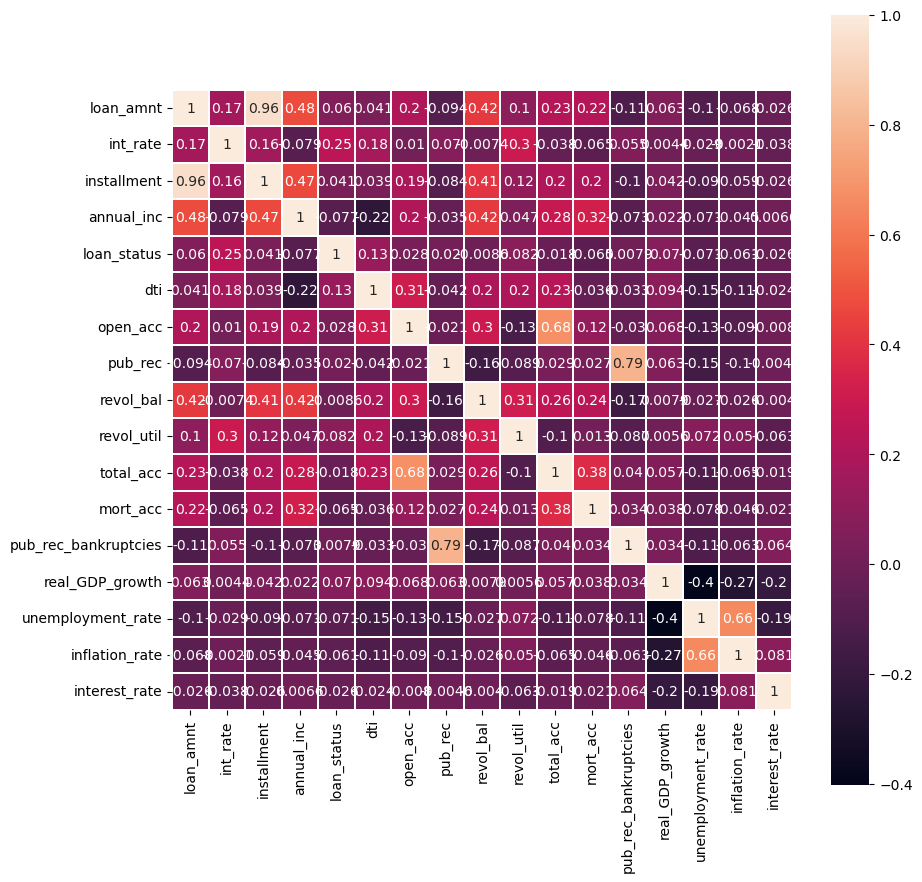

In [168]:
# Separating numerical and categorical data
n = data_cleand_win_nan.select_dtypes(include=['float64','int64'])
c = data_cleand_win_nan.select_dtypes(include=['object'])

# only numeric variables (before normalization)
plt.figure(figsize=(10,10))
sns.heatmap(n.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [169]:
# numerical columns positions in final dataset
num_cols = [col for col in data_final_scaled.columns if 'remainder' in col]


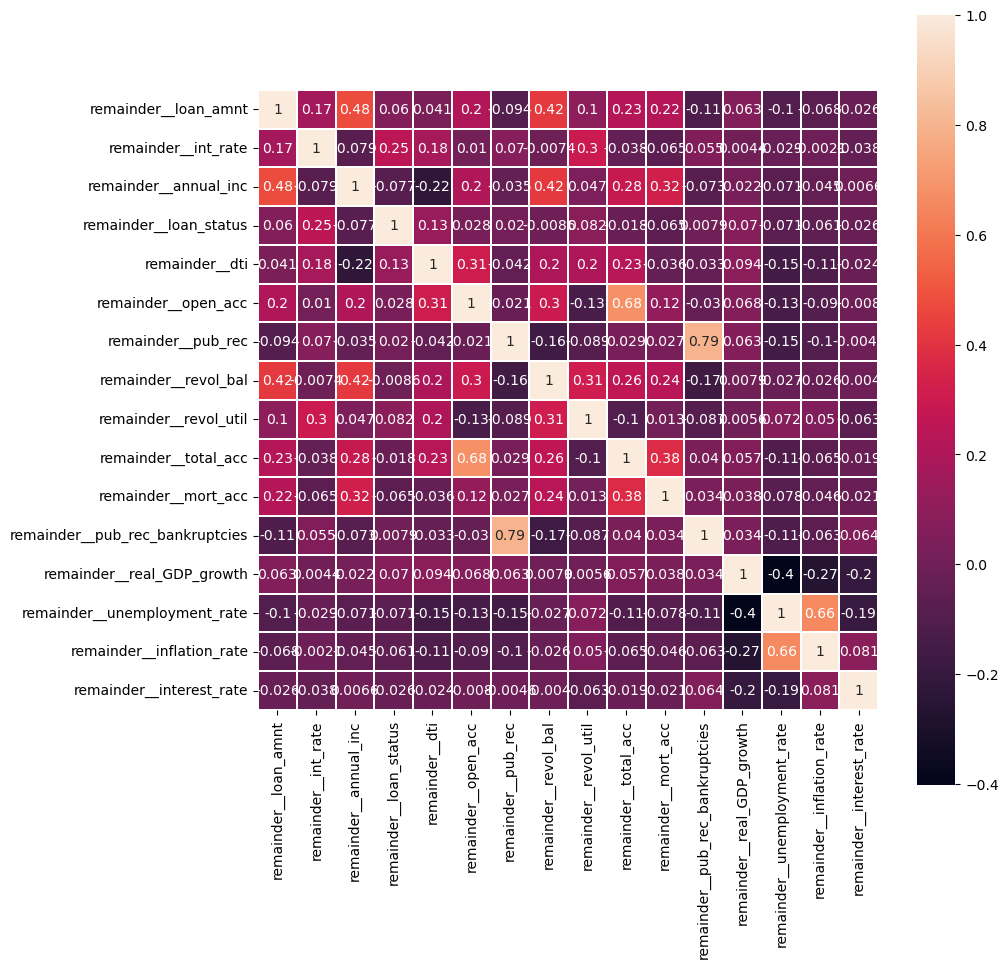

In [170]:
# only numeric variables (after normalization -> same as before)
plt.figure(figsize=(10,10))
sns.heatmap(data_final_scaled[num_cols].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

**Correlation with Target Variable** -> TBD with ALL

In [171]:
# Correlation of variables with loan_status
cor_target = data_final_scaled.corrwith(data_final_scaled["remainder__loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

remainder__loan_status                   1.00
remainder__int_rate                      0.25
remainder__dti                           0.13
remainder__revol_util                    0.08
ohe__issue_d_2015                        0.07
                                         ... 
ohe__home_ownership_MORTGAGE            -0.07
remainder__unemployment_rate            -0.07
remainder__annual_inc                   -0.08
ohe__verification_status_Not Verified   -0.09
ohe__term_ 36 months                    -0.17
Length: 183, dtype: float64